In [2]:
!pip install pybullet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 MB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pybullet: filename=pybullet-3.2.7-cp312-cp312-linux_x86_64.whl size=99873173 sha256=61e903b656e56527ee3109ff64926f9a3edde3df199ea41dad5f8f92cae354fb
  Stored in directory: /root/.cache/pip/wheels/72/95/1d/b336e5ee612ae9a019bfff4dc0bedd100ee6f0570db205fdf8
Successfully built pybullet


In [3]:
import pybullet as p
import pybullet_data
import time

physicsClient = p.connect(p.DIRECT)
print("PyBullet 시뮬레이션에 연결되었습니다.")

# PyBullet의 데이터 파일 경로를 설정
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setGravity(0, 0, -9.8) # 중력 설정
planeId = p.loadURDF("plane.urdf") # 바닥 생성

robot_start_pos = [0, 0, 0]
robot_start_orientation = p.getQuaternionFromEuler([0, 0, 0])
robotId = p.loadURDF("kuka_iiwa/model.urdf", robot_start_pos, robot_start_orientation, useFixedBase=True)
print(f"로봇(ID: {robotId})이 생성되었습니다.")

PyBullet 시뮬레이션에 연결되었습니다.
로봇(ID: 1)이 생성되었습니다.


In [4]:
# KUKA 로봇팔의 손끝 인덱스는 6임
end_effector_index = 6

target_position = [0.4, 0.3, 0.5]

print(f"로봇팔의 목표 지점: {target_position}")

로봇팔의 목표 지점: [0.4, 0.3, 0.5]


In [5]:
# p.calculateInverseKinematics() 함수를 이용해 역기구학을 계산함
target_joint_angles = p.calculateInverseKinematics(robotId, end_effector_index, target_position)

print("계산된 목표 관절 각도 (라디안):")
print(target_joint_angles)

계산된 목표 관절 각도 (라디안):
(0.5105820646926287, 0.38034877775935505, 0.1618418894980706, -1.6959079908499666, 0.00474263206803488, 0.3664438483203505, 0.0)


In [6]:
## print 결과 보니 target_joint_angles는 7개 관절의 목표 각도를 담은 리스트 형태

In [7]:
p.setJointMotorControlArray(
    bodyIndex=robotId,
    jointIndices=range(p.getNumJoints(robotId)), # 0~6번 관절
    controlMode=p.POSITION_CONTROL,             # 위치 제어 모드
    targetPositions=target_joint_angles         # 3단계에서 계산한 목표 각도
)

for _ in range(240):
    p.stepSimulation()

print("로봇팔 이동 완료!")

로봇팔 이동 완료!


설정한 목표 위치: [0.4, 0.3, 0.5]
이동 후 실제 위치: [0.45456548358870347, 0.34454271487271027, 0.4813471588575366]


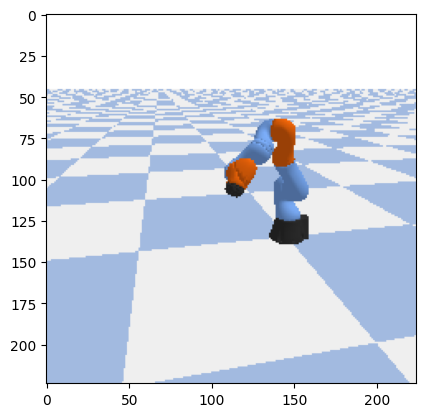

In [8]:
# 이동이 끝난 후, 순기구학 이용해서 로봇팔 손끝의 실제 3D 위치를 확인
final_link_state = p.getLinkState(robotId, end_effector_index)
final_position = final_link_state[0]

print(f"설정한 목표 위치: {target_position}")
print(f"이동 후 실제 위치: {list(final_position)}")

# 결과 확인
viewMatrix = p.computeViewMatrix(
    cameraEyePosition=[0.8, 1.9, 1],
    cameraTargetPosition=[0.5, 0.5, 0.5],
    cameraUpVector=[0, 0, 0.7]
)
projectionMatrix = p.computeProjectionMatrixFOV(fov=60.0, aspect=1.0, nearVal=0.1, farVal=100.0)
width, height, rgbImg, _, _ = p.getCameraImage(224, 224, viewMatrix, projectionMatrix)

import matplotlib.pyplot as plt
plt.imshow(rgbImg)
plt.show()